<a href="https://colab.research.google.com/github/psukphranee/Machine-Learning-Projects/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fashion MNIST

Fashion MNIST. MNIST analog for neural networks. Instead of handwritten digits, we have grayscale images of fashion articles. The data are 28x28 pixel intensities ranging from 0 to 255 (ie 8 bits). Labels are integer entries 0-9 given by the table:

0.	T-shirt/top
1.	Trouser
2.	Pullover
3.	Dress
4.	Coat
5.	Sandal
6.	Shirt
7.	Sneaker
8.	Bag
9.	Ankle boot

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data();
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

4431872/4422102 [==============================] - 0s 0us/step


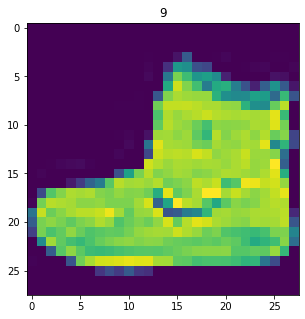

In [3]:
plt.figure(figsize=(5,5))
plt.imshow(x_train[0])
plt.title(y_train[0])
plt.show()

The data are already split into training and testing sets. We'll take the first 5000 samples from the training set to be the validation set. We also normalize the features since we are using SGD to optimize. 

In [4]:
x_train = x_train/255.0
x_valid, x_train = x_train[:5000], x_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [5]:
#Build model

model = keras.models.Sequential(
    [
     keras.layers.Flatten(input_shape=[28,28]),
     keras.layers.Dense(300, activation='relu'),
     keras.layers.Dense(300, activation='relu'),
     keras.layers.Dense(10, activation='softmax')
    ]
)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 10)                3010      
                                                                 
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


In [7]:
hidden1 = model.layers[1]
hidden1

In [8]:
h1_weights = hidden1.get_weights()

In [9]:
len(h1_weights)

2

In [10]:
h1_weights[0].shape

(784, 300)

In [11]:
h1_weights[1].shape

(300,)

In [12]:
#Compile model 

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="SGD",
    metrics=["accuracy"]
)

In [13]:
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=30,
    validation_data=(x_valid, y_valid)
)

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7177 - accuracy: 0.7634 - val_loss: 0.5549 - val_accuracy: 0.8150
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4866 - accuracy: 0.8318 - val_loss: 0.4423 - val_accuracy: 0.8498
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4428 - accuracy: 0.8457 - val_loss: 0.4102 - val_accuracy: 0.8584
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4143 - accuracy: 0.8544 - val_loss: 0.3967 - val_accuracy: 0.8608
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3951 - accuracy: 0.8624 - val_loss: 0.3746 - val_accuracy: 0.8708
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3788 - accuracy: 0.8666 - val_loss: 0.3727 - val_accuracy: 0.8710
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3649 - accuracy: 0.8715 - val_loss: 0.3635 - val_accuracy